# Sizing a Packed Bed Reactor for Multiple Reactions

The design equations for a PBR, in differential form, are

$$ \frac{dF_i}{dW} = r_i = \sum_j \nu_{ij} r_j$$

where
$F_i$ is the molar flowrate of species $i$,
$W$ is the mass of catalyst,
$r_i$ is the rate of generation of species $i$,
$\nu_{ij}$ is the stoichiometric coefficient of species $i$ in reaction $j$,
and
$r_j$ is the rate of reaction $j$.

The reaction network 

$$A + 2B \rightarrow C \\
2A + 3C \rightarrow D$$

has four components and two reactions. The corresponding rate laws are

$$r_1 = k_1 C_A C_B^2  \\
r_2 = k_2 C_A^2 C_C^3$$

where the rate constants $k_1$ = 100 L$^3$/kg/mol$^2$/min and $k_2$ = 20,000 L$^5$/kg/mol$^4$/min
have been formulated using 1 mol C as a basis.

The four resulting ODEs must be solved simultaneously:

$$
\begin{aligned}
  \frac{dF_A}{dW} &= r_A = -r_1 -\frac{2}{3} r_2  \\
  \frac{dF_B}{dW} &= r_B = -2 r_1  \\
  \frac{dF_C}{dW} &= r_C = r_1 - r_2  \\
  \frac{dF_D}{dW} &= r_D = \frac{1}{3}r_2
\end{aligned}
$$

The inlet molar flow rates are $F_{A0}$ = $F_{B0}$ = 50 kmol/hr and the inlet volumetric flow rate is $\dot{V}_0$ = 500 m$^3$/hr. 

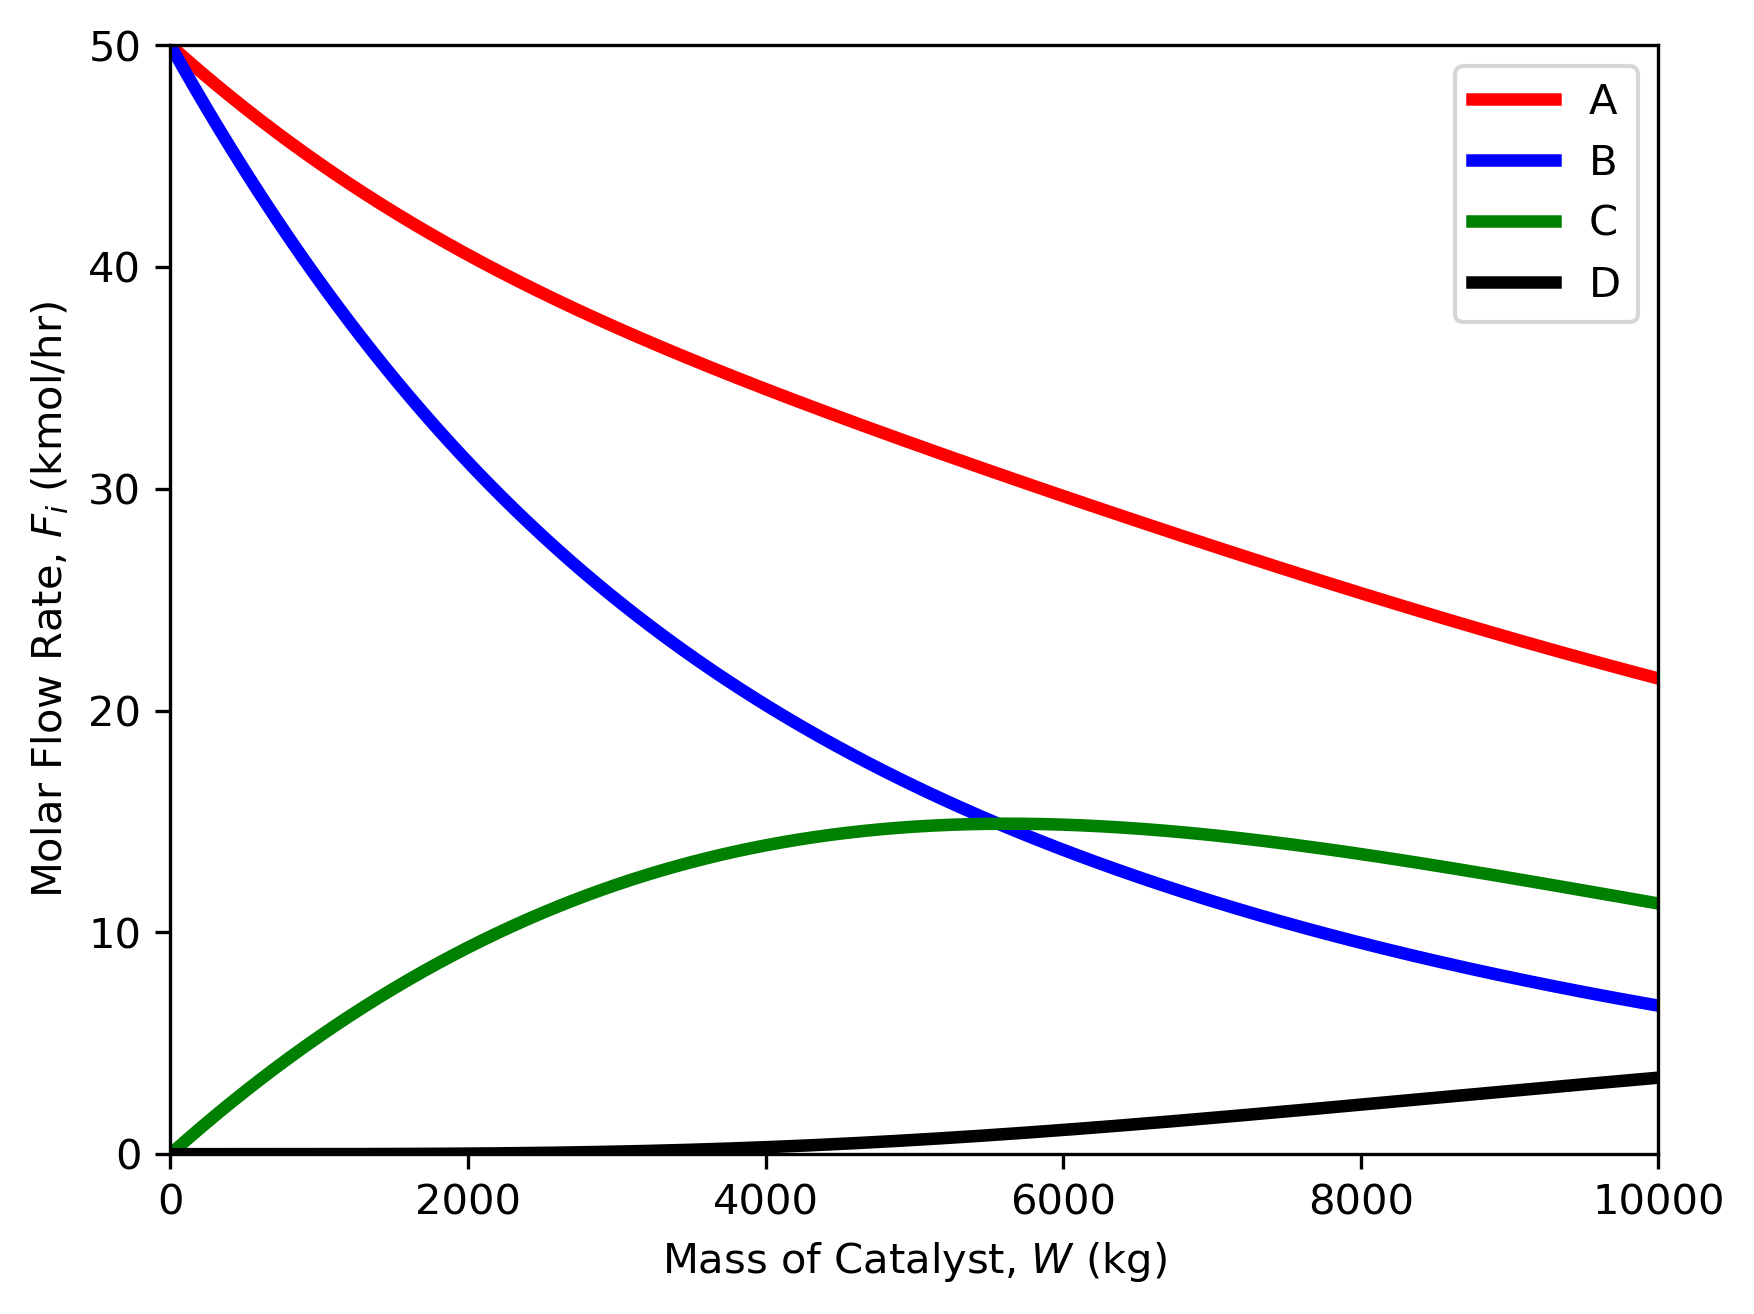

In [1]:
################################################################################
# IMPORT MODULES
################################################################################
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as intx

################################################################################
# DEFINE CONSTANTS
################################################################################
# Internal Units
# Length: m
# Mass: kg
# Time: s
# Temperature: K
# Amount: mol

# universal constants
Rg = 8.314 # J/mol/K

# unit conversions
hr_to_s = 3600.
min_to_s = 60.
k_to_u = 1000.
L_to_m3 = 1.e-3

# reactions
nRxns = 2
nSpecies = 4

# stoichiometry
nu = np.zeros((nRxns,nSpecies))
nu[0] = np.array([-1, -2,  1, 0]) # 1 mol C basis
nu[1] = np.array([-2./3,  0, -1, 1./3]) # 1 mol C basis
k = np.array([100 * L_to_m3**3/min_to_s,
            20000 * L_to_m3**5/min_to_s])

# feed conditions
F0 = np.array([50,50,0,0]) * k_to_u / hr_to_s # mol/s
FT0 = sum(F0)
V0 = 500 / hr_to_s # m^3/s
CT0 = FT0/V0 # mol/m^3

# reactor parameters
wMax = 10000

################################################################################
# DEFINE FUNCTIONS
################################################################################
def rxns(F,w):
  FT = sum(F)
  C = CT0*F/FT
  r = np.array([k[0]*C[0]*C[1]**2.,
                k[1]*C[0]**2*C[2]**3])
  dF = [np.dot(nu[:,i],r) for i in range(nSpecies)]
  return dF

################################################################################
# FILE MANAGEMENT
################################################################################
# create output files
pngFile = '32_reactorDesign_multipleRxns_pfr.png'

################################################################################
# MAIN CODE
################################################################################
# independent variable
w = np.linspace(0,wMax,1000)

# solve the ODEs
F = intx.odeint(rxns,F0,w).T
FA,FB,FC,FD = F

# plot the results
plt.figure(dpi=300)
plt.plot(w,FA*hr_to_s/k_to_u,'r-',lw=3,label='A')
plt.plot(w,FB*hr_to_s/k_to_u,'b-',lw=3,label='B')
plt.plot(w,FC*hr_to_s/k_to_u,'g-',lw=3,label='C')
plt.plot(w,FD*hr_to_s/k_to_u,'k-',lw=3,label='D')
plt.xlabel('Mass of Catalyst, $W$ (kg)')
plt.xlim(0,wMax)
plt.ylabel('Molar Flow Rate, $F_i$ (kmol/hr)')
plt.ylim(0,np.max(F)*hr_to_s/k_to_u)
plt.legend(loc='upper right')
plt.savefig(pngFile)

In [2]:
i = np.argmax(FC)
print('Optimum mass of catalyst, W = %.0f kg' % w[i])
print('Molar flow rates:')
print('  F_A = %.3g kmol/hr' % (FA[i]/k_to_u*hr_to_s))
print('  F_B = %.3g kmol/hr' % (FB[i]/k_to_u*hr_to_s))
print('  F_C = %.3g kmol/hr' % (FC[i]/k_to_u*hr_to_s))
print('  F_D = %.3g kmol/hr' % (FD[i]/k_to_u*hr_to_s))
print('Selectivity:')
print('  F_C/F_D = %.3g' % (FC[i]/FD[i]))
print('Conversion:')
print('  X_B = %.3g' % (1-FB[i]/F0[1]))
print('Yield:')
print('  Y_C/A = %.3g' % (FC[i]/(F0[0]-FA[i])))

Optimum mass of catalyst, W = 5626 kg
Molar flow rates:
  F_A = 30.5 kmol/hr
  F_B = 14.7 kmol/hr
  F_C = 14.9 kmol/hr
  F_D = 0.912 kmol/hr
Selectivity:
  F_C/F_D = 16.3
Conversion:
  X_B = 0.706
Yield:
  Y_C/A = 0.766
